# Final Project - DSCI 508
## Jeffery Boczkaja

    In the following notebook we take a look at a dataset of almost 1,000 members in a fictional Data Science Union. There are about 20 features tracked in a few ways. Some are how much is paid in dues a month, total paid over lifetime of the membership, how they pay, when they pay, citizenship, marital status, and more. With this data we will create several machine learning algorithms that try to predict whether or not a member will leave the union.
    First off the data is visualized using several techniques. There are a couple box and whisker plots that display the distribution of monthly dues, total dues paid, and the months members have been in the union. Following that are some scatterplots of intersting relationships, in particular, payment method vs months in union. Next is a couple stacked bar plots showing relationships between the number of people in managment by their sex as well as the amount of management vs nonmangement based on payment method.
    The data is then normalized and has numeric values mapped onto strings for more in depth analysis. A scree plot is created after the columns are tuned and the ID column is dropped due it being unneeded. After this is completed we move onto the last phase of the project which is creating algorithms to determine loyalty to the union.
    We create five different models to try to predict whether a member will stay in the union or leave. First up is a neural network, followed by a decision tree, then a random forest, next is a support vector machine with a linear regression used as the final model. Out of the five models created the neural network was the most successful predicting with an almost 80% accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("Jeffery-TRAIN.csv")

In [2]:
train.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Jeffery1,Female,0,No,No,12,No,Maryville,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,34,435,No
1,Jeffery2,Male,0,Yes,No,50,Yes,No,Dial-in,Maryville,...,Maryville,Maryville,Maryville,Maryville,Two year,No,Electronic check,20,1013,No
2,Jeffery3,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),107,7677,No
3,Jeffery4,Male,0,Yes,Yes,70,Yes,Yes,Dial-in,Maryville,...,Maryville,Maryville,Maryville,Maryville,Two year,No,Mailed check,25,1782,No
4,Jeffery5,Male,0,No,No,3,No,Maryville,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25,67,Yes


## Cleaning the Data

In [3]:
median_totaldues = train[train['TotalDues'] != '#VALUE!']['TotalDues'].astype(float).median()
train['TotalDues'] = train['TotalDues'].replace('#VALUE!', median_totaldues).astype(float)

## Box and Whisker Without Outliers

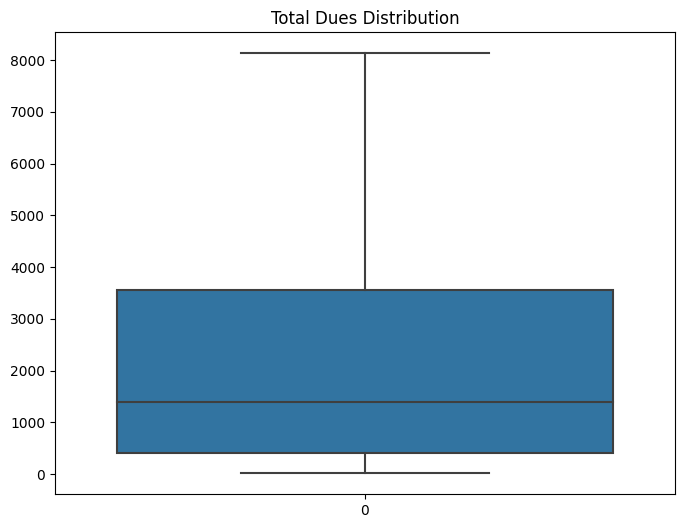

In [4]:
median_totaldues = train[train['TotalDues'] != '#VALUE!']['TotalDues'].astype(float).median()

train['TotalDues'] = train['TotalDues'].replace('#VALUE!', median_totaldues).astype(float)

plt.figure(figsize=(8, 6))
sns.boxplot(data=train['TotalDues'], showfliers=False)
plt.title('Total Dues Distribution')
plt.show()

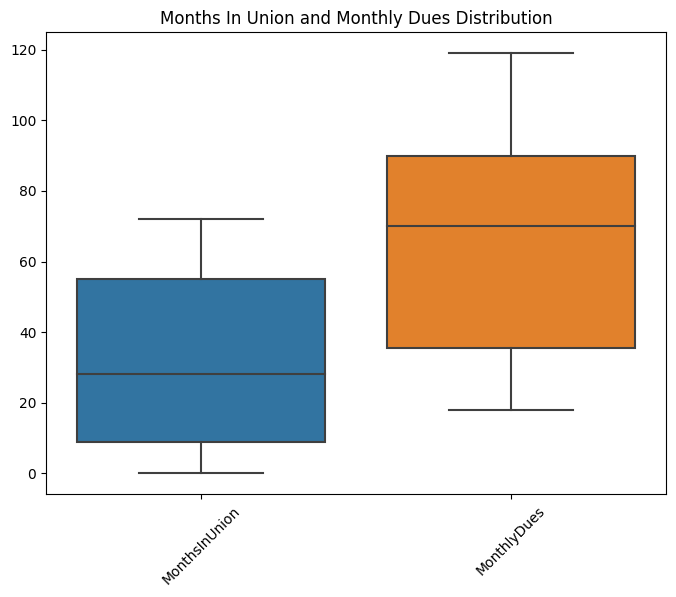

In [5]:
selected_columns_2 = ['MonthsInUnion', 'MonthlyDues']

plt.figure(figsize=(8, 6))
sns.boxplot(data=train[selected_columns_2], showfliers=False)
plt.title('Months In Union and Monthly Dues Distribution')
plt.xticks(rotation=45)
plt.show()

## Box and Whisker With Outliers

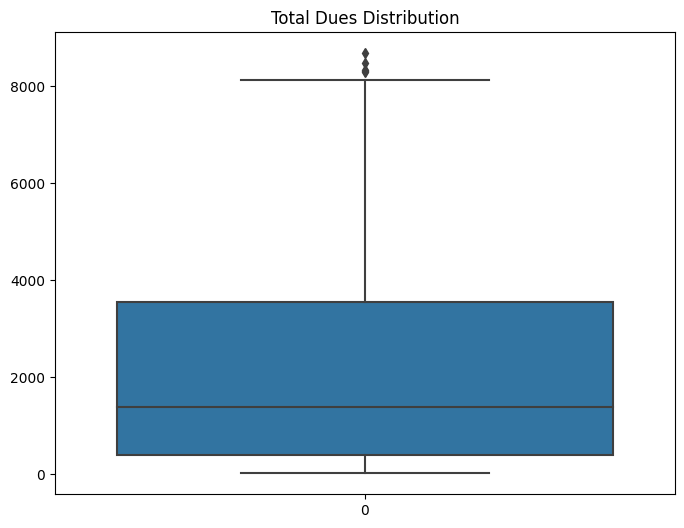

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train['TotalDues'], showfliers=True)
plt.title('Total Dues Distribution')
plt.show()

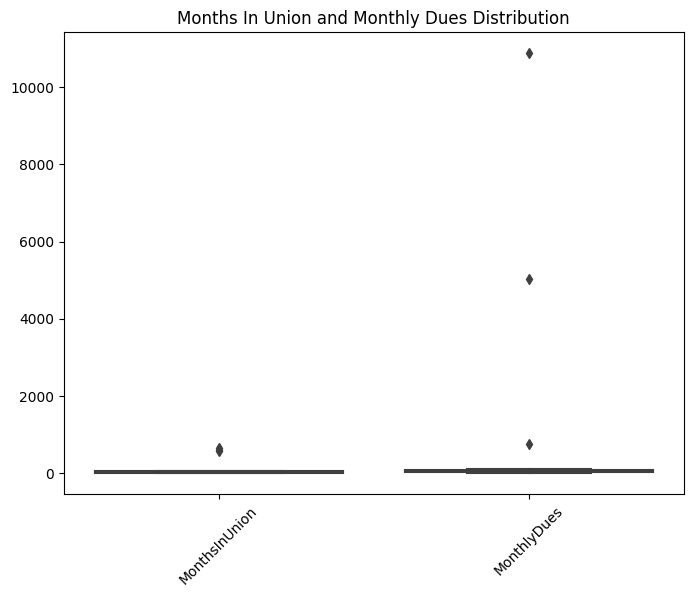

In [7]:
selected_columns_2 = ['MonthsInUnion', 'MonthlyDues']

plt.figure(figsize=(8, 6))
sns.boxplot(data=train[selected_columns_2], showfliers=True)
plt.title('Months In Union and Monthly Dues Distribution')
plt.xticks(rotation=45)
plt.show()

## Scatter Plots

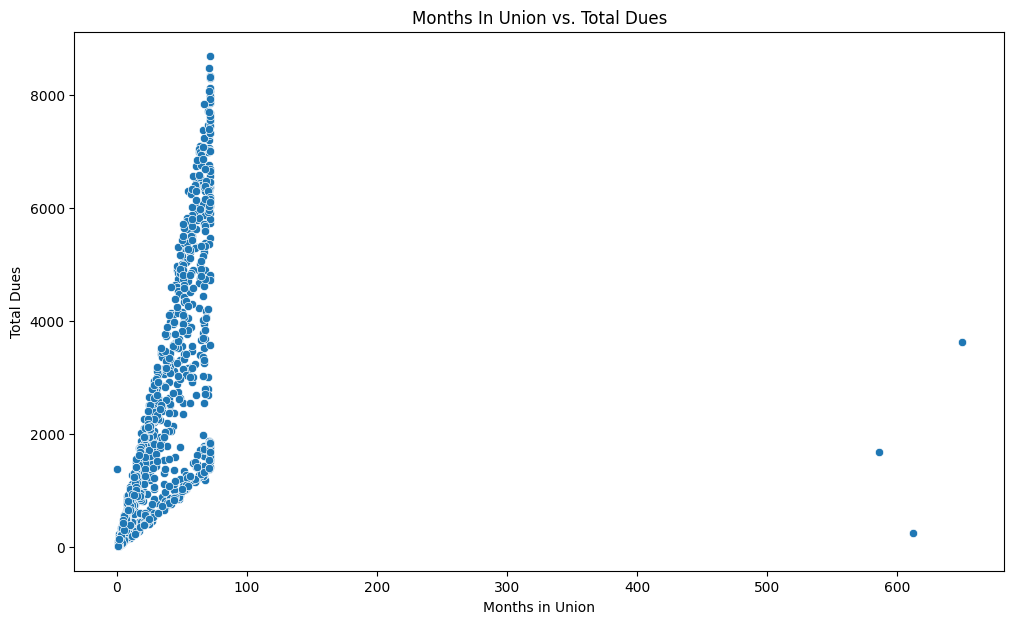

In [8]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x=train['MonthsInUnion'], y=train['TotalDues'])

plt.title('Months In Union vs. Total Dues')
plt.xlabel('Months in Union')
plt.ylabel('Total Dues')
plt.show()

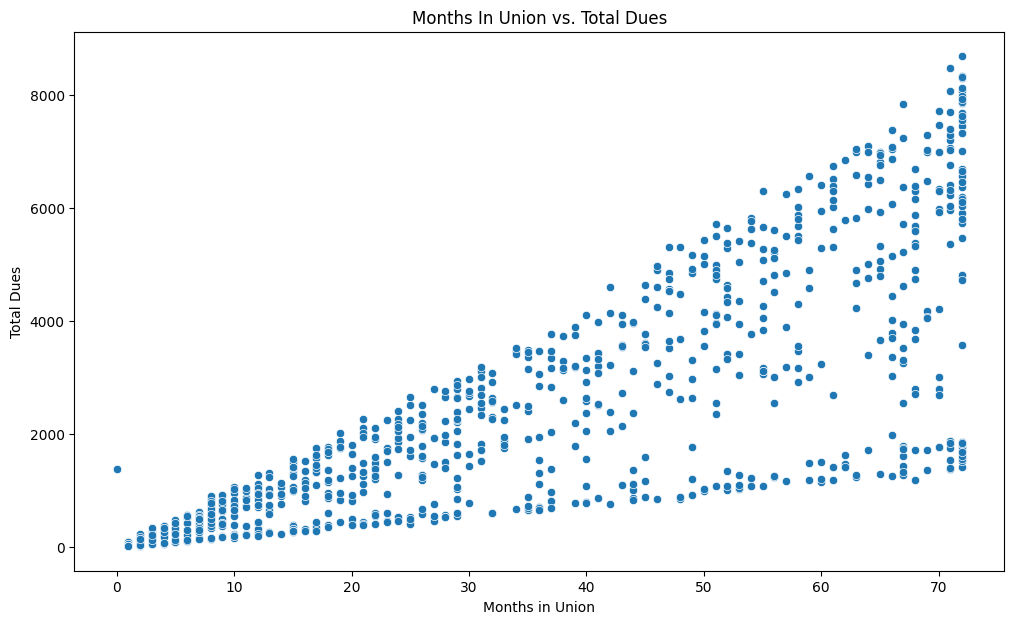

In [9]:
filtered_data = train[train['MonthsInUnion'] <= 100]

plt.figure(figsize=(12, 7))
sns.scatterplot(x=filtered_data['MonthsInUnion'], y=filtered_data['TotalDues'])
plt.title('Months In Union vs. Total Dues')
plt.xlabel('Months in Union')
plt.ylabel('Total Dues')
plt.show()

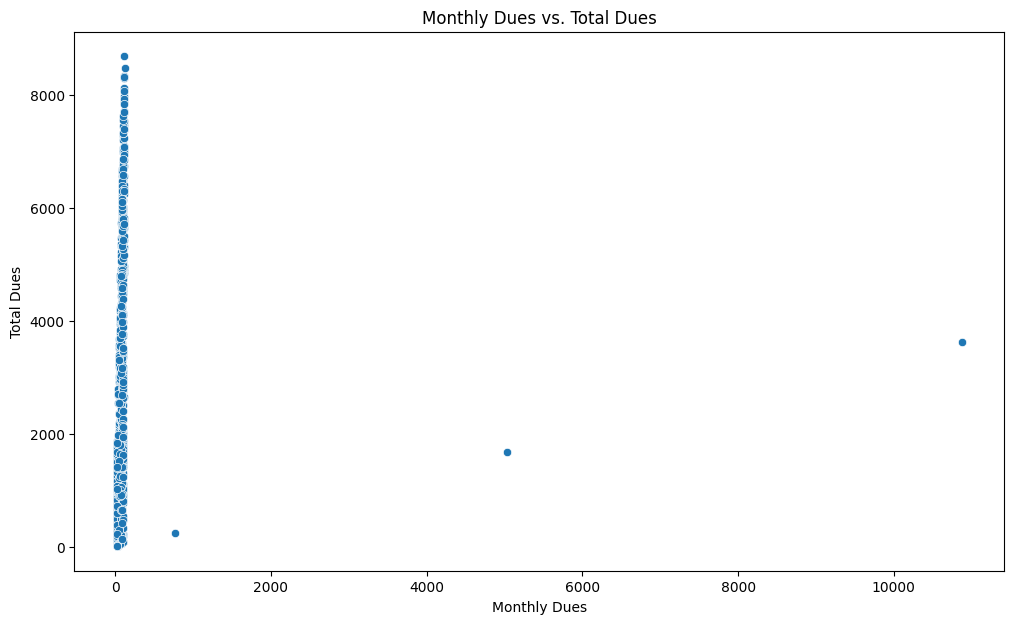

In [10]:
filtered_data = train[train['MonthlyDues'] <= 200]

plt.figure(figsize=(12, 7))

sns.scatterplot(x=train['MonthlyDues'], y=train['TotalDues'])

plt.title('Monthly Dues vs. Total Dues')
plt.xlabel('Monthly Dues')
plt.ylabel('Total Dues')
plt.show()

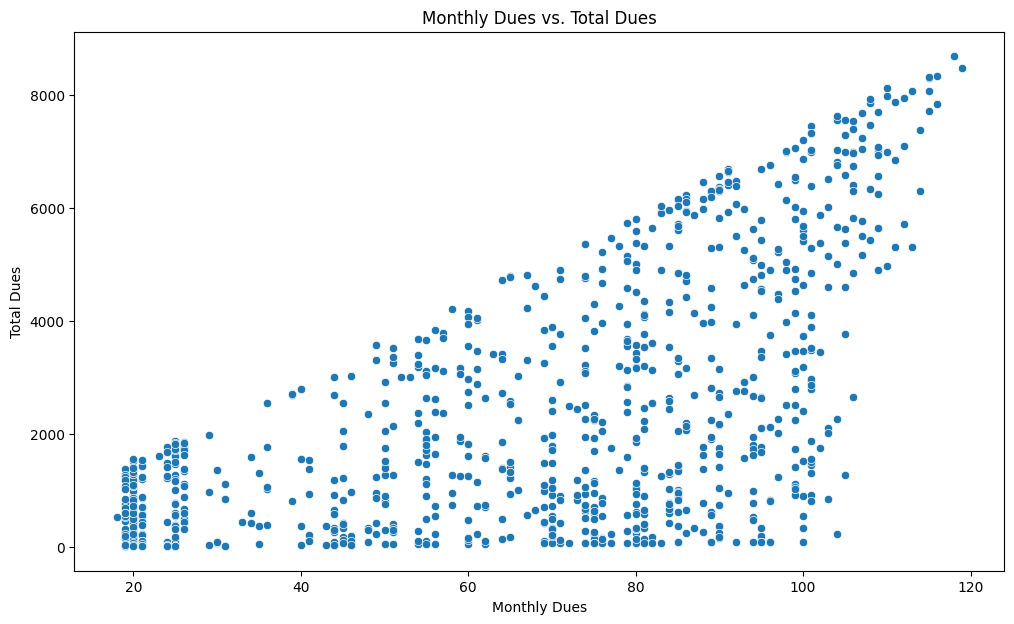

In [11]:
filtered_data_200 = train[train['MonthlyDues'] < 200]

plt.figure(figsize=(12, 7))
sns.scatterplot(x=filtered_data_200['MonthlyDues'], y=filtered_data_200['TotalDues'])
plt.title('Monthly Dues vs. Total Dues')
plt.xlabel('Monthly Dues')
plt.ylabel('Total Dues')
plt.show()

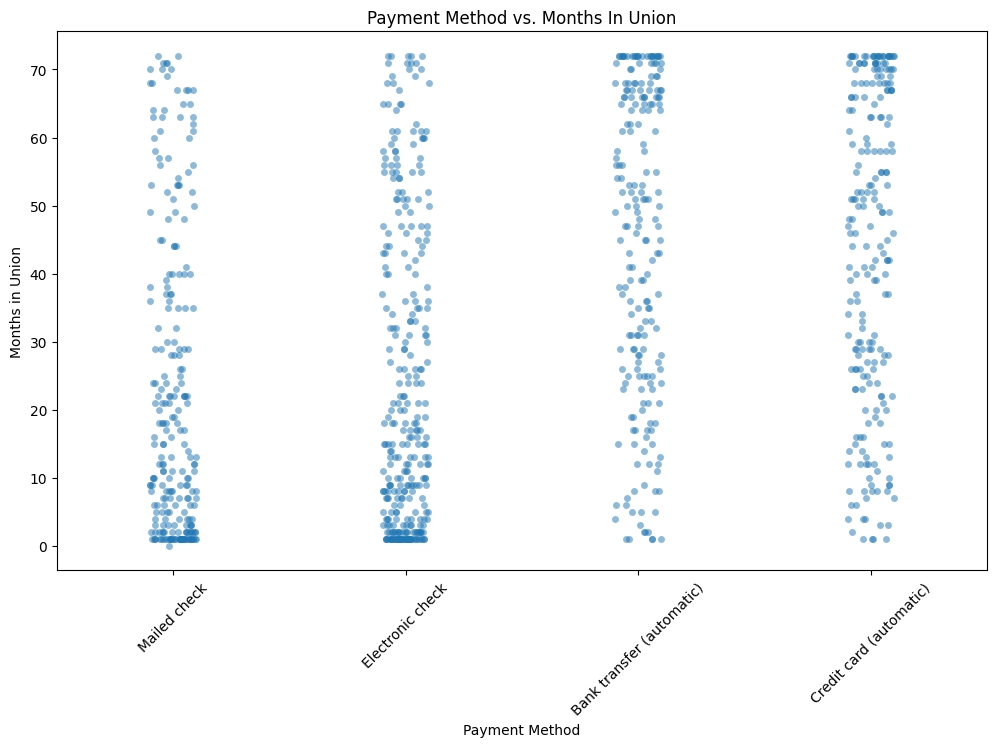

In [12]:
filtered_data_union_100 = train[train['MonthsInUnion'] < 100]

plt.figure(figsize=(12, 7))
sns.stripplot(x=filtered_data_union_100['PaymentMethod'], y=filtered_data_union_100['MonthsInUnion'], jitter=True, marker='o', alpha=0.5)
plt.title('Payment Method vs. Months In Union')
plt.xlabel('Payment Method')
plt.ylabel('Months in Union')
plt.xticks(rotation=45)
plt.show()

## Stacked Bar Plots

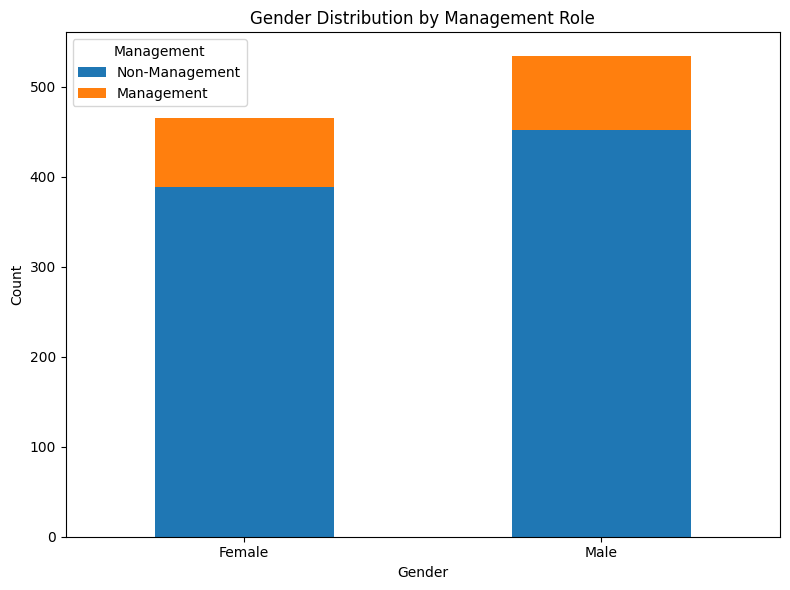

In [13]:
gender_management_counts = train.groupby(['gender', 'Management']).size().unstack()

gender_management_counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('Gender Distribution by Management Role')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Management', labels=['Non-Management', 'Management'])
plt.tight_layout()
plt.show()

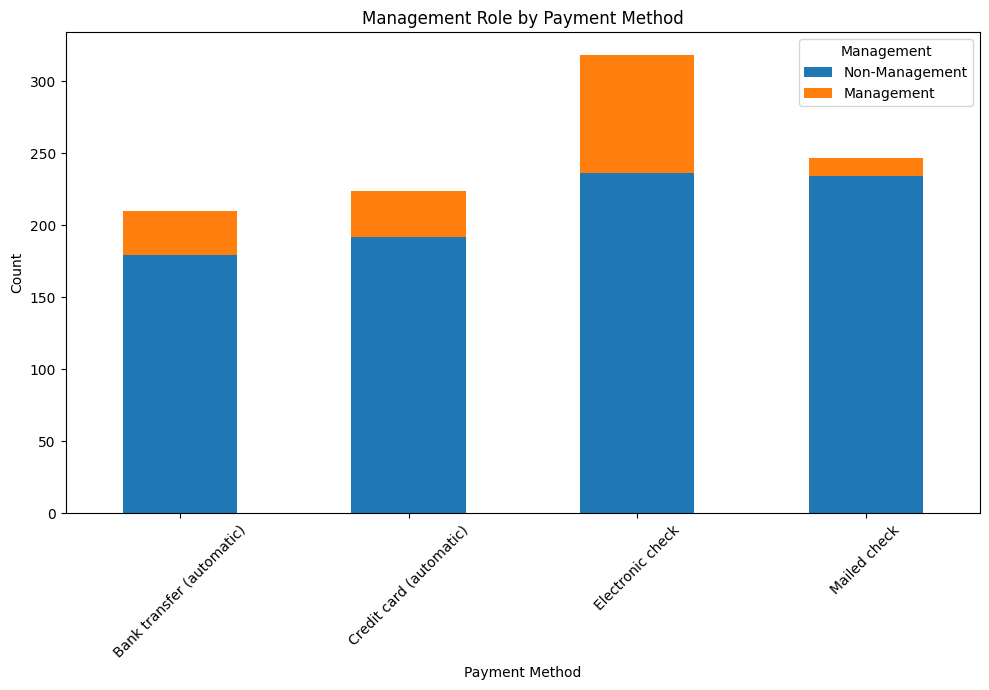

In [14]:
management_payment_counts = train.groupby(['PaymentMethod', 'Management']).size().unstack()

management_payment_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Management Role by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Management', labels=['Non-Management', 'Management'])
plt.tight_layout()
plt.show()

## Normalizing and Standardizing Data

In [15]:
train.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Jeffery1,Female,0,No,No,12,No,Maryville,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,34,435.0,No
1,Jeffery2,Male,0,Yes,No,50,Yes,No,Dial-in,Maryville,...,Maryville,Maryville,Maryville,Maryville,Two year,No,Electronic check,20,1013.0,No
2,Jeffery3,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),107,7677.0,No
3,Jeffery4,Male,0,Yes,Yes,70,Yes,Yes,Dial-in,Maryville,...,Maryville,Maryville,Maryville,Maryville,Two year,No,Mailed check,25,1782.0,No
4,Jeffery5,Male,0,No,No,3,No,Maryville,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25,67.0,Yes


In [16]:
binary_mapping = {
    'gender': {'Male': 1, 'Female': 0},
    'USAcitizen': {'Yes': 1, 'No': 0},
    'Married': {'Yes': 1, 'No': 0},
    'ContinuingEd': {'Yes' : 1, 'No' : 0},
    'PaperlessBilling' : {'Yes' : 1, 'No' : 0},
    'LeftUnion' : {'Yes' : 1, 'No' : 0}
}

train.replace(binary_mapping, inplace=True)

train.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Jeffery1,0,0,0,0,12,0,Maryville,DSL,Yes,...,No,Yes,No,No,One year,1,Mailed check,34,435.0,0
1,Jeffery2,1,0,1,0,50,1,No,Dial-in,Maryville,...,Maryville,Maryville,Maryville,Maryville,Two year,0,Electronic check,20,1013.0,0
2,Jeffery3,0,1,1,0,72,1,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,1,Bank transfer (automatic),107,7677.0,0
3,Jeffery4,1,0,1,1,70,1,Yes,Dial-in,Maryville,...,Maryville,Maryville,Maryville,Maryville,Two year,0,Mailed check,25,1782.0,0
4,Jeffery5,1,0,0,0,3,0,Maryville,DSL,No,...,No,No,No,No,Month-to-month,0,Electronic check,25,67.0,1


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['MonthsInUnion', 'MonthlyDues', 'TotalDues']

train[columns_to_normalize] = scaler.fit_transform(train[columns_to_normalize])

train.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Jeffery1,0,0,0,0,0.018462,0,Maryville,DSL,Yes,...,No,Yes,No,No,One year,1,Mailed check,0.001473,0.048004,0
1,Jeffery2,1,0,1,0,0.076923,1,No,Dial-in,Maryville,...,Maryville,Maryville,Maryville,Maryville,Two year,0,Electronic check,0.000184,0.114701,0
2,Jeffery3,0,1,1,0,0.110769,1,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,1,Bank transfer (automatic),0.008195,0.883683,0
3,Jeffery4,1,0,1,1,0.107692,1,Yes,Dial-in,Maryville,...,Maryville,Maryville,Maryville,Maryville,Two year,0,Mailed check,0.000645,0.203439,0
4,Jeffery5,1,0,0,0,0.004615,0,Maryville,DSL,No,...,No,No,No,No,Month-to-month,0,Electronic check,0.000645,0.005539,1


In [18]:
mapping_scheme = {
    'No': 0,
    'Yes': 1,
    'Maryville': 2
}

for column in ['FeatureA', 'FeatureB', 'FeatureC', 'FeatureD', 'FeatureE', 'FeatureF', 'FeatureG']:
    train[column] = train[column].replace(mapping_scheme)

train.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Jeffery1,0,0,0,0,0.018462,0,2,DSL,1,...,0,1,0,0,One year,1,Mailed check,0.001473,0.048004,0
1,Jeffery2,1,0,1,0,0.076923,1,0,Dial-in,2,...,2,2,2,2,Two year,0,Electronic check,0.000184,0.114701,0
2,Jeffery3,0,1,1,0,0.110769,1,1,Fiber optic,1,...,0,0,1,1,One year,1,Bank transfer (automatic),0.008195,0.883683,0
3,Jeffery4,1,0,1,1,0.107692,1,1,Dial-in,2,...,2,2,2,2,Two year,0,Mailed check,0.000645,0.203439,0
4,Jeffery5,1,0,0,0,0.004615,0,2,DSL,0,...,0,0,0,0,Month-to-month,0,Electronic check,0.000645,0.005539,1


In [19]:
connectivity_mapping = {
    'DSL': 0,
    'Dial-in': 1,
    'Fiber optic': 2,
    'onlyViaER': 3
}

train['Connectivity'] = train['Connectivity'].replace(connectivity_mapping)

train.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Jeffery1,0,0,0,0,0.018462,0,2,0,1,...,0,1,0,0,One year,1,Mailed check,0.001473,0.048004,0
1,Jeffery2,1,0,1,0,0.076923,1,0,1,2,...,2,2,2,2,Two year,0,Electronic check,0.000184,0.114701,0
2,Jeffery3,0,1,1,0,0.110769,1,1,2,1,...,0,0,1,1,One year,1,Bank transfer (automatic),0.008195,0.883683,0
3,Jeffery4,1,0,1,1,0.107692,1,1,1,2,...,2,2,2,2,Two year,0,Mailed check,0.000645,0.203439,0
4,Jeffery5,1,0,0,0,0.004615,0,2,0,0,...,0,0,0,0,Month-to-month,0,Electronic check,0.000645,0.005539,1


In [20]:
dues_frequency_mapping = {
    'One year': 0,
    'Two year': 1,
    'Month-to-month': 2
}

train['DuesFrequency'] = train['DuesFrequency'].replace(dues_frequency_mapping)

train.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Jeffery1,0,0,0,0,0.018462,0,2,0,1,...,0,1,0,0,0,1,Mailed check,0.001473,0.048004,0
1,Jeffery2,1,0,1,0,0.076923,1,0,1,2,...,2,2,2,2,1,0,Electronic check,0.000184,0.114701,0
2,Jeffery3,0,1,1,0,0.110769,1,1,2,1,...,0,0,1,1,0,1,Bank transfer (automatic),0.008195,0.883683,0
3,Jeffery4,1,0,1,1,0.107692,1,1,1,2,...,2,2,2,2,1,0,Mailed check,0.000645,0.203439,0
4,Jeffery5,1,0,0,0,0.004615,0,2,0,0,...,0,0,0,0,2,0,Electronic check,0.000645,0.005539,1


In [21]:
payment_method_mapping = {
    'Mailed check': 0,
    'Electronic check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
}

train['PaymentMethod'] = train['PaymentMethod'].replace(payment_method_mapping)

train.head()

,ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Jeffery1,0,0,0,0,0.018462,0,2,0,1,...,0,1,0,0,0,1,0,0.001473,0.048004,0
1,Jeffery2,1,0,1,0,0.076923,1,0,1,2,...,2,2,2,2,1,0,1,0.000184,0.114701,0
2,Jeffery3,0,1,1,0,0.110769,1,1,2,1,...,0,0,1,1,0,1,2,0.008195,0.883683,0
3,Jeffery4,1,0,1,1,0.107692,1,1,1,2,...,2,2,2,2,1,0,0,0.000645,0.203439,0
4,Jeffery5,1,0,0,0,0.004615,0,2,0,0,...,0,0,0,0,2,0,1,0.000645,0.005539,1


In [22]:
train = train.drop('ID', axis=1)

train.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,0,0,0,0,0.018462,0,2,0,1,0,0,1,0,0,0,1,0,0.001473,0.048004,0
1,1,0,1,0,0.076923,1,0,1,2,2,2,2,2,2,1,0,1,0.000184,0.114701,0
2,0,1,1,0,0.110769,1,1,2,1,1,0,0,1,1,0,1,2,0.008195,0.883683,0
3,1,0,1,1,0.107692,1,1,1,2,2,2,2,2,2,1,0,0,0.000645,0.203439,0
4,1,0,0,0,0.004615,0,2,0,0,0,0,0,0,0,2,0,1,0.000645,0.005539,1


## Scree Plot

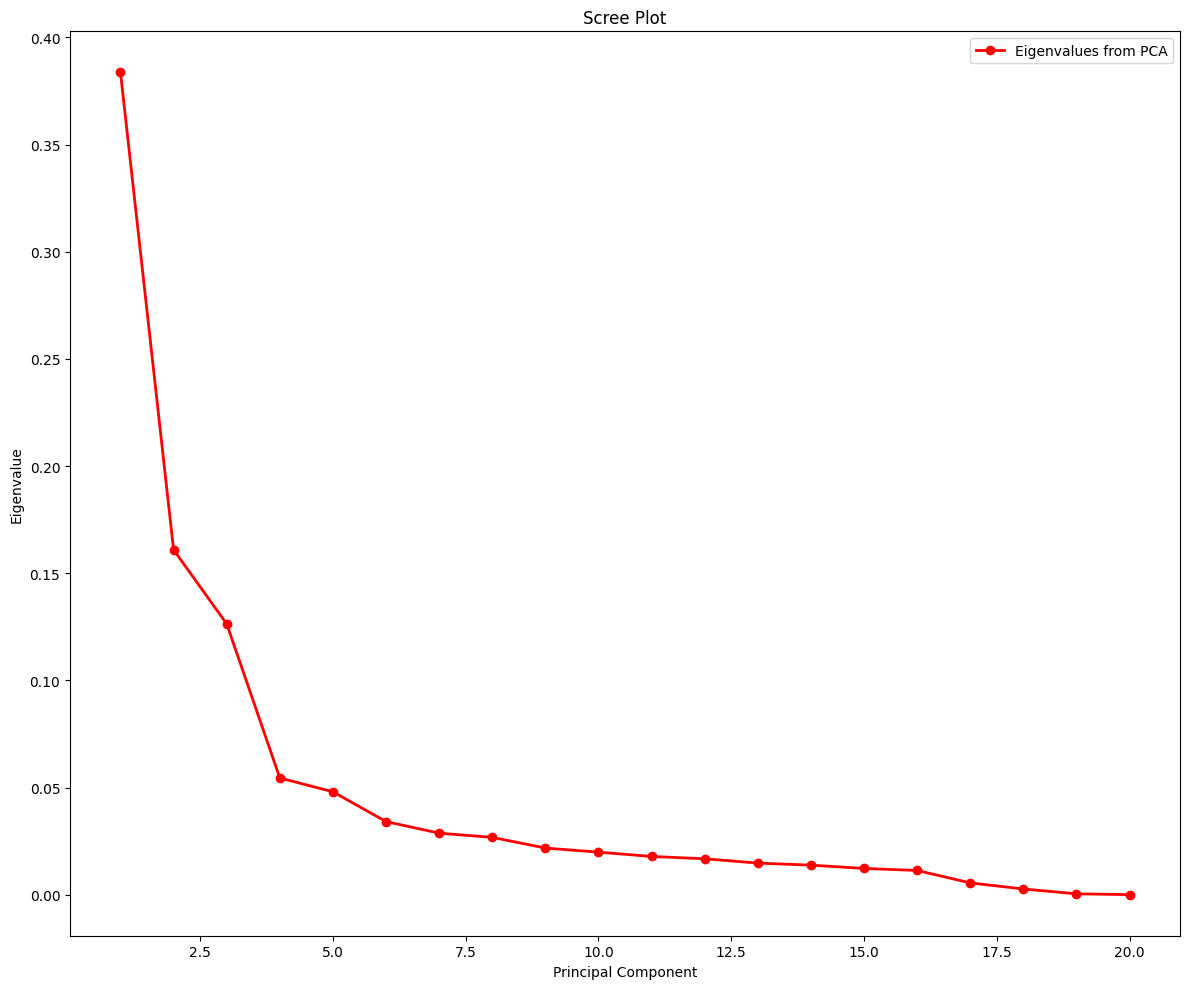

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(train)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(12, 10))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend(['Eigenvalues from PCA'], loc='best')
plt.tight_layout()
plt.show()

## Neural Network

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = train.drop(columns=['LeftUnion'])
y = train['LeftUnion']

X_encoded = pd.get_dummies(X, drop_first=True)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp_classifier = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=135, activation='relu', random_state=42)

mlp_classifier.fit(X_train, y_train)

y_val_pred_mlp = mlp_classifier.predict(X_val)

accuracy_mlp = accuracy_score(y_val, y_val_pred_mlp)

report_mlp = classification_report(y_val, y_val_pred_mlp)

accuracy_mlp = round(accuracy_mlp, 4)

accuracy_mlp, print(report_mlp)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       219
           1       0.69      0.44      0.54        81

    accuracy                           0.80       300
   macro avg       0.76      0.69      0.71       300
weighted avg       0.78      0.80      0.78       300



C:\Users\whitl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (135) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.7967, None)

In [26]:
!pip install networkx

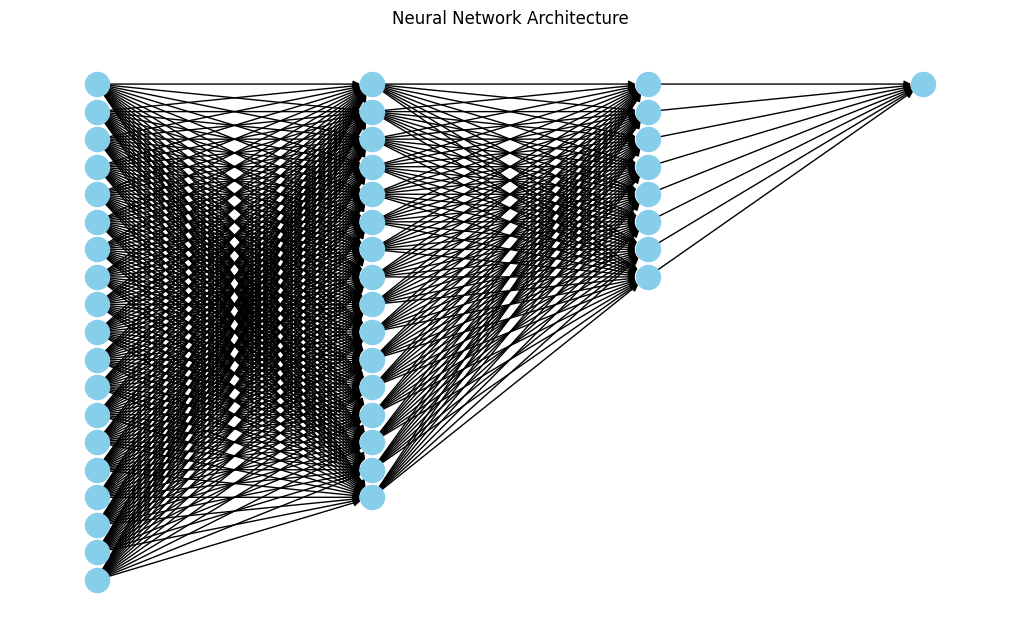

In [27]:
import networkx as nx

def plot_neural_network(layers):
    G = nx.DiGraph()
    pos = {}
    layer_sizes = layers
    total_layers = len(layer_sizes)
    
    for i in range(total_layers):
        for j in range(layer_sizes[i]):
            G.add_node((i, j))
            pos[(i, j)] = (i, -j)
    
    for i in range(1, total_layers):
        for j in range(layer_sizes[i-1]):
            for k in range(layer_sizes[i]):
                G.add_edge((i-1, j), (i, k))

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=False, node_size=300, node_color="skyblue", font_weight='bold')
    plt.title("Neural Network Architecture")
    plt.show()

plot_neural_network([X_train.shape[1], 16, 8, 1])

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_val_pred_dt = dt_classifier.predict(X_val)

accuracy_dt = round(accuracy_score(y_val, y_val_pred_dt), 4)

report_dt = classification_report(y_val, y_val_pred_dt)

accuracy_dt, print(report_dt)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       219
           1       0.43      0.38      0.41        81

    accuracy                           0.70       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.69      0.70      0.69       300



(0.6967, None)

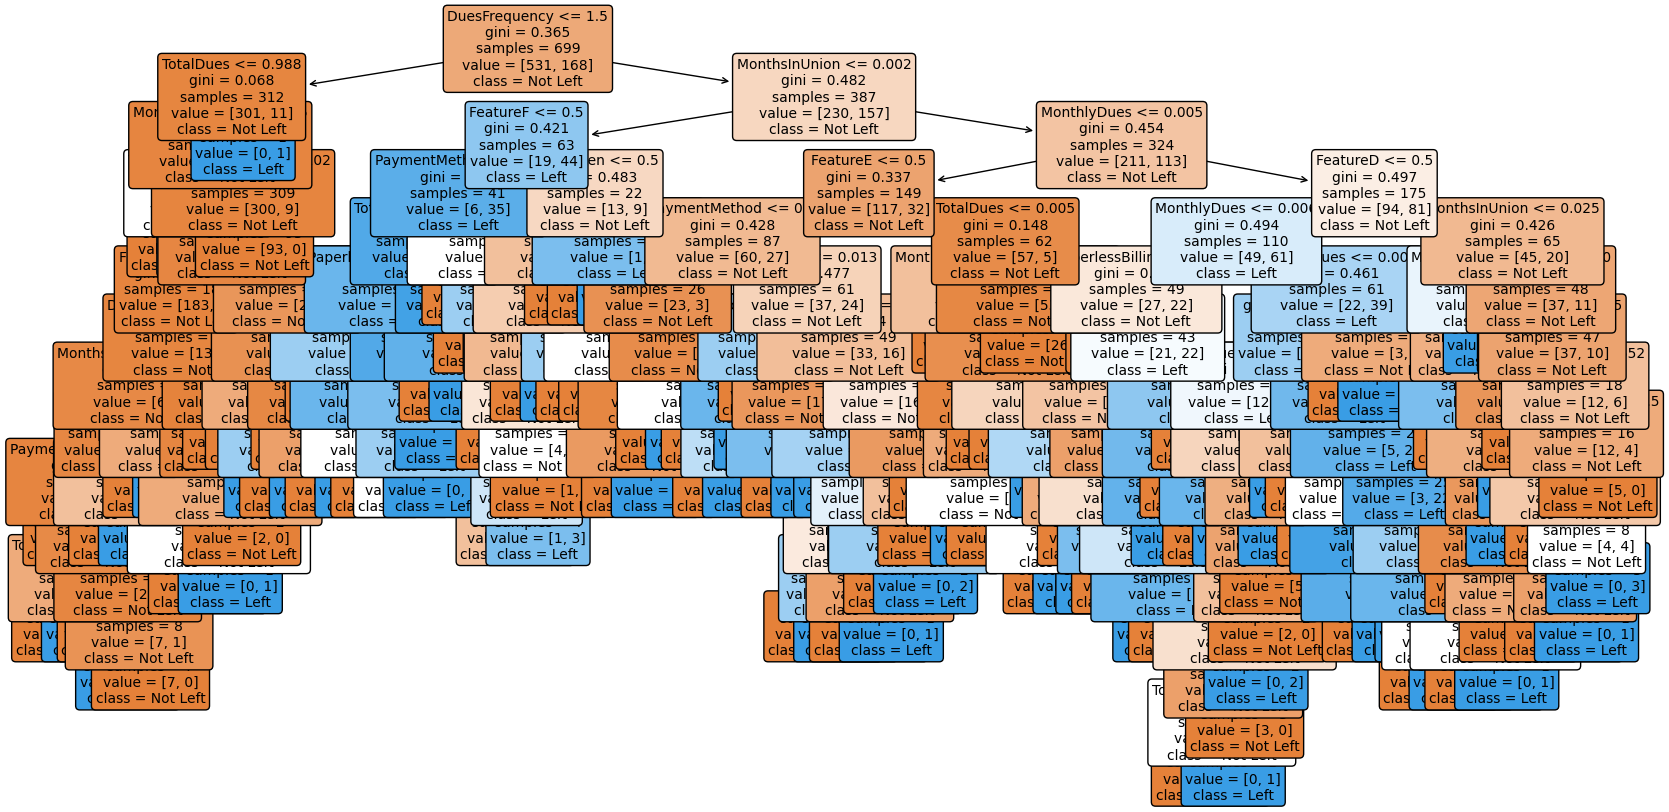

In [29]:
from sklearn.tree import plot_tree
feature_names_list = X_train.columns.tolist()

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=feature_names_list, class_names=['Not Left', 'Left'], filled=True, rounded=True, fontsize=10)
plt.show()

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_val_pred_rf = rf_classifier.predict(X_val)

accuracy_rf = round(accuracy_score(y_val, y_val_pred_rf), 4)

report_rf = classification_report(y_val, y_val_pred_rf)

accuracy_rf, print(report_rf)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       219
           1       0.61      0.33      0.43        81

    accuracy                           0.76       300
   macro avg       0.70      0.63      0.64       300
weighted avg       0.74      0.76      0.74       300



(0.7633, None)

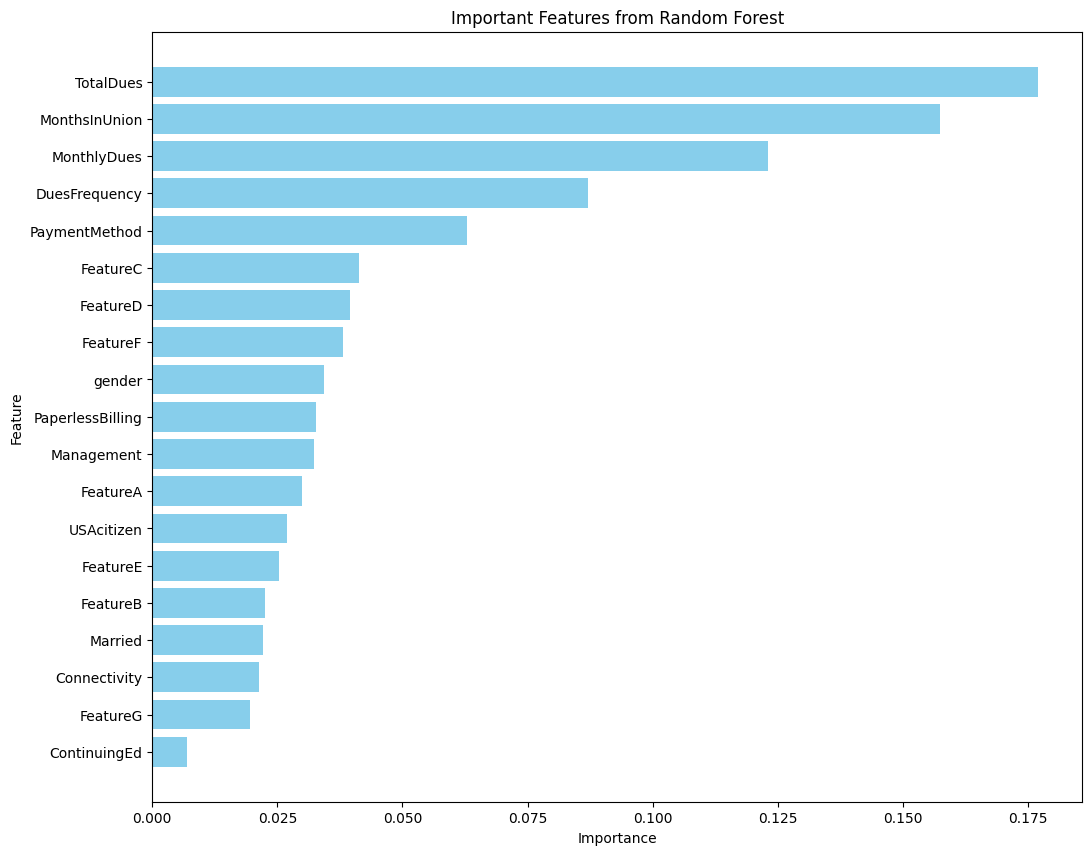

In [31]:
feature_importances = rf_classifier.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Important Features from Random Forest')
plt.gca().invert_yaxis()
plt.show()

## Support Vector Machine

In [32]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_val_pred_svm = svm_classifier.predict(X_val)

accuracy_svm = round(accuracy_score(y_val, y_val_pred_svm), 4)

report_svm = classification_report(y_val, y_val_pred_svm)

accuracy_svm, print(report_svm)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       219
           1       0.70      0.40      0.50        81

    accuracy                           0.79       300
   macro avg       0.75      0.67      0.69       300
weighted avg       0.78      0.79      0.77       300



(0.79, None)

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_val_pred_continuous = lin_reg.predict(X_val)

y_val_pred_thresholded = np.where(y_val_pred_continuous >= 0.5, 1, 0)

accuracy_lin_reg = round(accuracy_score(y_val, y_val_pred_thresholded), 4)

report_lin_reg = classification_report(y_val, y_val_pred_thresholded)

accuracy_lin_reg, print(report_lin_reg)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       219
           1       0.72      0.36      0.48        81

    accuracy                           0.79       300
   macro avg       0.76      0.65      0.67       300
weighted avg       0.78      0.79      0.76       300



(0.79, None)

## Blind Guess or the Machine?

If I was to make a guess myself and go row by row deciding whether someone would stay I would probably only narrow in on a couple columns. I would likely look at how much they have paid/pay a month and maybe something else like paperless billing. I would probably, if lucky, get around 50% accuracy just because the outcome is a yes or no. The reason that using an algorithm would be more successful is that it has a chance to use all the data, consider all the factors, and use that to make predicitons. It's just able to do more with more in less time. That's going to give it an edge over my heurstics of focusing on what I personally think is the most important part.

## What Would I Have Done Differently?

If I had more time to work on this task I would try to run the data without outliers. I didn't see too many based on the visualizations that I made but removing them could improve the accuracy of the models that I used. Being able to spend more time on fine tuning could also have yielded greater results. I could go through many more options and see what works best. I did for example play with the iterations for the nueral network to get the result I have. If I wanted to I could spend a lot more time fiddling with it to see how accurate I can make the model. Beyond this I would take out particular columns like FeatureA and see how that affects the outcome. Does removing FeatureA and FeatureD create more accurate predictions? I could comb through many combinations but that would require time.